# Cтатистика
---

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import statistics
import sympy
plt.style.use('seaborn')

## Базовые определения

  * **Мода** - значение признака, которое встречается максимально часто.
  * **Медиана** - значение признака, которое делит упорядоченное множество пополам.
  * **Среднее** - сумма значений признака, деленная на количество.

Размах: $R = R_{max} - R_{min}$

Дисперсия:  $\sigma^{2} = \frac{\sum(x_i - \overline{x})^2}{n}; $ для генеральной совокупности; $\sigma^{2} = \frac{\sum(x_i - \overline{x})^2}{n - 1} $ для выборки.

Среднеквадратическое отклонение(СКО): $ \sigma = \sqrt{\sigma^{2}} $

Свойства:
* $\sigma^{2}_{x + a} = \sigma^{2}_{x} $
* $\sigma_{x + a} = \sigma_{x} $
* $\sigma^{2}_{x \cdot a} = \sigma^{2}_{x \cdot a} $
* $\sigma_{x \cdot a} = \sigma_{x \cdot a} $

Пример. Рассчитайте среднеквадратическое отклонение данных выборочных значений:
1 5 2 7 1 9 3 8 5 9

In [2]:
sample = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9]
mean = np.average(sample)
disp = (sum([(x - mean)**2 for x in sample])) / (len(sample) - 1)
disp2 = sum((sample - mean)**2) / (len(sample) - 1)
disp3 = statistics.variance(sample) # для выборки
disp4 = statistics.pvariance(sample) # для генеральной совокупности
if (disp == disp2 == disp3):
    stddev = math.sqrt(disp)
    print('Дисперсия =', int(disp))
    print('СКО =', '%.2f'%stddev)
else:
    print('В рассчетах допущена ошибка')

Дисперсия = 10
СКО = 3.16


## Стандартизация и нормализация

Стандартизация набора данных включает в себя изменение масштаба распределения значений так, чтобы среднее значение наблюдаемых значений было 0, а стандартное отклонение - 1.

Нормализация - это изменение масштаба данных из исходного диапазона, чтобы все значения находились в диапазоне от 0 до 1.

Преобразование полученных данных в стандартную Z-шкалу

$ Z_i = \frac{x_i - \overline{x}}{\sigma} $

In [3]:
from numpy.random import normal

r_sample = [normal(100, 100) for i in range (200)]

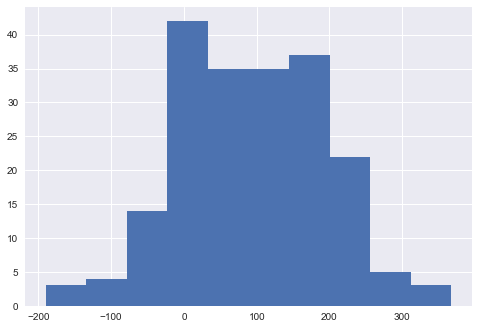

In [4]:
_hist = pd.Series(r_sample)
_hist.hist()
plt.show()

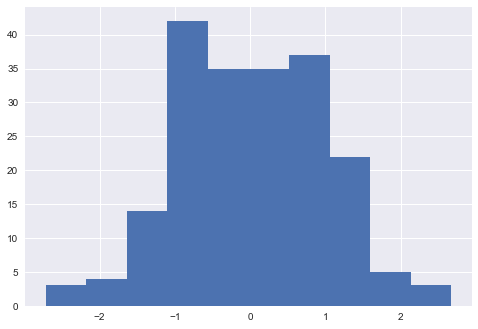

In [5]:
s_sample = [(i - np.average(r_sample)) / statistics.pstdev(r_sample) for i in r_sample]
_hist = pd.Series(s_sample)
_hist.hist()
plt.show()

## Правило трех сигм

Для нормального распределения характерно:

* $M_x \pm \sigma \approx 68$% наблюдений
* $M_x \pm 1.96\sigma \approx 95$% наблюдений
* $M_x \pm 3\sigma \approx 100$% наблюдений

Найти процент наблюдений, находящихся в определенном диапазоне можно по формуле:

$ Z_i = \frac{x_i - M_x}{\sigma} $

Далее смотрим по z-таблице(таблице нормального распределения)



## Центральная предельная теорема

Множество средних выборок из генеральной совокупности (ГС необязательно должна иметь нормальное распределние) будут иметь нормальное распределение. Причём средняя этого распределения будет близко к средней генеральной совокупности, а стандарное отклонение этого распределение будет називаться стандарной ошибкой среднего (se).
Стандартная ошибка среднего (se) - теоретическое стандартное отклонение всех средних выборки размера , извлекаемое из совокупности.

$S_\overline{x} = \frac{\sigma}{\sqrt{n}}$ , где $\sigma$ - стандартное отклонение, а n - численность выборки. \
Если размер выборки достаточно большой (>30) и она репрезативна, то вместо стандарного отклонения ГС мы можем взять стандарное отклонение выборки.

$$ se = \frac{sd}{\sqrt{N}} $$

## Построение доверительных интервалов

In [6]:
from scipy import stats
from numpy import random, mean


sample = [random.normal(100, 100) for i in range(100)]
se = stats.sem(sample) #standard error of the mean
print(se)
left = mean(sample) - 1.96 * se
right = mean(sample) + 1.96 * se
print('Доверительный интервал:', '%.2f'%left, '...', '%.2f'%right)

9.790898833904365
Доверительный интервал: 81.81 ... 120.19


In [7]:
_mean = 100
std = 4
n = 2000
se = std / (n ** 0.5)
left = _mean - 1.96 * se
right = _mean + 1.96 * se
print('Доверительный интервал:', '%.2f'%left, '...', '%.2f'%right)

Доверительный интервал: 99.82 ... 100.18


In [8]:
_mean = 10
sd = 5
n = 100
se = sd / (n ** 0.5)
z = stats.norm.ppf(0.995) # percent point function - возвращает значение z от заданного p
left = _mean - z * se
right = _mean + z * se
print('Доверительный интервал:', '%.2f'%left, '...', '%.2f'%right)

Доверительный интервал: 8.71 ... 11.29


## Статитстическая проверка гипотез

Проверка гипотез осуществляется с помощью p-значений. 

P-значение (англ. P-value) — величина, используемая при тестировании статистических гипотез. Фактически это вероятность ошибки при отклонении нулевой гипотезы (ошибки первого рода). 

In [9]:
_mean = 20
n = 64
x = 18.5
sd = 4

se = sd / n**0.5
z = (x - _mean) / se
p = stats.norm.cdf(z) * 2

if (p < 0.05):
    print('отклоняем H0')
else:
    print('отклоняем H1')

отклоняем H0


In [10]:
n = 64
sd = 4
m = 20
x = 18.5

se = sd / n**0.5
z = (x - m) / se
left = m - z * se
right = m + z * se
print('Доверительный интервал:', '%.2f'%left, '%.2f'%right)

Доверительный интервал: 21.50 18.50


В среднем слушатели курса по введению в статистику набирают 115 баллов, однако, в 2015 году средний балл  случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. Рассчитайте p уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.

In [11]:
m = 115
x = 118
n = 144
sd = 9

se = sd / n**0.5
z = (x - m) / se
p = 1 - stats.norm.cdf(4)
if (p < 0.05):
    print('отклоняем H0')
else:
    print('отклоняем H1')

отклоняем H0


In [12]:
from scipy.stats import t

#cdf - cumulative distribution function(функция распределения)
# показывает с какой вероятностью случайная величина примет значение <= t
#pdf - probability density function(функция плотности)
# показывает, какая доля выборки примет значения <= t
t.cdf(-2, 14) * 2

0.06528795288911197

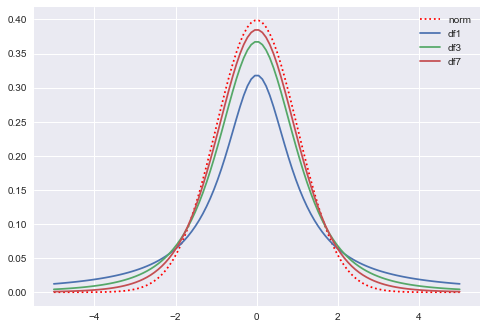

In [13]:
from scipy.stats import t, norm
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 110)
y = norm.pdf(x)
y1 = t.pdf(x, df = 1)
y2 = t.pdf(x, df = 3)
y3 = t.pdf(x, df = 7)
plt.plot(x, y, 'r:', label='norm')
plt.plot(x, y1, label='df1')
plt.plot(x, y2, label='df3')
plt.plot(x, y3, label='df7')
plt.legend()
plt.show()

### Подробно про нормальное и t-распредление

В видео лекциях говорилось, что мы используем t-распределение в ситуации небольшого объема выборки. Необходимо более подробно пояснить, зачем это нужно.

Вернемся к предельной центральной теореме, мы уже узнали, что если некий признак в генеральной совокупности распределен **нормально** со средним $\mu$ и стандартным отклонением $\sigma$, и мы будем многократно извлекать выборки одинакового размера n, и для каждой выборки рассчитывать, как далеко выборочное среднее $\bar{X}$ ˉ
 отклонилось от среднего в генеральной совокупности в единицах стандартной ошибки среднего:
 

$$\large z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

то эта величина z будет иметь стандартное нормальное распределение со средним равным нулю и стандартным отклонением равным единице.

Обратите внимание, что для расчета стандартной ошибки мы используем именно стандартное отклонение в генеральной совокупности - $\sigma$. Ранее мы уже обсуждали, что на практике $\sigma$ нам практически никогда не известна, и для расчета стандартной ошибки мы используем выборочное стандартное отклонение.

Так вот, строго говоря в таком случае распределение отклонения выборочного среднего и среднего в генеральной совокупности, деленного на стандартную ошибку, теперь будет описываться именно при помощи t - распределения.

$$\large t = \frac{\bar{X} - \mu}{\frac{sd}{\sqrt{n}}}$$


таким образом, в случае неизвестной $\sigma$ мы **всегда будем иметь дело с t-распределением**. На этом этапе вы должны с негодованием спросить меня, почему же мы применяли z-критерий в первом модуле курса, для проверки гипотез, используя выборочное стандартное отклонение?

Мы уже знаем, что при довольно большом объеме выборки (обычно в учебниках приводится правило, n > 30) t-распределение совсем близко подбирается к нормальному распределению:

Поэтому иногда, для простоты расчетов говорится, что если n > 30, то мы будем использовать свойства нормального распределения для наших целей. Строго говоря, это конечно неправильный подход, который часто критикуют. В до компьютерную эпоху этому было некоторое объяснение, чтобы не рассчитывать для каждого n больше 30 соответствующее критическое значение t - распределения, статистики как бы округляли результат и использовали нормальное распределение для этих целей. Сегодня, конечно, с этим больше никаких проблем нет, и все статистические программы, разумеется, без труда рассчитают все необходимые показатели для t - распределения с любым числом степеней свободы. Действительно при выборках очень большого объема t - распределение практически не будет отличаться от нормального, однако, хоть и очень малые но различия все равно будут.

Поэтому, правильнее будет сказать, что мы используем t - распределение не потому что у нас маленькие выборки, а потому что мы не знаем стандартное отклонение в генеральной совокупности. Поэтому в дальнейшем мы всегда будем использовать t - распределение для проверки гипотез, если нам неизвестно стандартное отклонение в генеральной совокупности, необходимое для расчета стандартной ошибки, даже если объем выборки больше 30.

## Сравнение двух средних. t-критерий Стьюдента

t-критерий Стьюдента — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства средних значений в двух выборках. Нулевая гипотеза предполагает, что средние равны (отрицание этого предположения называют гипотезой сдвига). Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение. 

$$ t = \frac{\bar{X_1} - \bar{X_2}}{se}$$

$$ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} $$

Откуда берётся такая формула $se$?:

$$ (se_1)^2 = (\frac{sd_1}{\sqrt{n_1}})^2 = \frac{sd_1^2}{n_1} $$
 
То есть:

$$ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} = \sqrt{se_1^2 + se_2^2} $$

причем ответ на вопрос, почему верно это равенство, кроется в свойстве дисперсии: дисперсия суммы независимых случайных величин равна сумме их дисперсий. а отклонение - это корень из дисперсии. отсюда ваша последняя формула

### Задача
Известны температуры плавления ДНК для двух выборок. Доказать наличие или отсутствие существенных различий между двумя этими выборками, используя t-критерий Стьюдента

In [18]:
from scipy import stats
import pandas as pd
import numpy as np
import statistics
from math import sqrt

sample1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3,
          99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
sample2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0,
           69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]
df = pd.DataFrame({'Вид 1': sample1, 'Вид 2': sample2})
t = df.agg(['mean', 'std', 'count', 'sem']).transpose()
t

,mean,std,count,sem
Вид 1,100.815,10.246503,20.0,2.291188
Вид 2,75.735,15.458102,20.0,3.456537


In [19]:
'''произведем рассчеты в ручную по формулам'''
'''находим t-критическое, значение при котором 95% значений будет в диапазоне +-t сигм при заданных степенях свободы'''
'''так как нам интересны значения с двух концов графика, то мы вычисляем t-крит исходя из p = 97.5'''

t_crit = stats.t.ppf((1 + 0.95)/2, t['count']['Вид 1'] - 1) 
t_value = (t['mean']['Вид 1'] - t['mean']['Вид 2'])/sqrt((
           t['std']['Вид 1']**2 + t['std']['Вид 2']**2)/20)
t_value, t_crit

(6.047819587898917, 2.093024054408263)

Таким образом t-критическое = 2.09, полученное же t-значение = 6.04 для наших выборок, говорит о том, что наши значения выходят далеко за рамки доверительного интервала. Узнаем, какова вероятность получить подобные значения случайным образом.

In [20]:
p_value = 1 - stats.t(19).cdf(t_value)
print('Отвергаем H0') if p_value < 0.05 else print ('Принимаем H0')
print(f'p_value = {p_value:.5f}')

Отвергаем H0
p_value = 0.00000


In [21]:
'''для рассчета t критеря Стьюдента и p уровня значимости можно использовать scipy.stats.ttest_ind'''

t_value = stats.ttest_ind(df['Вид 1'], df['Вид 2'])
t_value

Ttest_indResult(statistic=6.04781958789892, pvalue=4.894702897415829e-07)

In [22]:
from scipy import stats
from math import sqrt

x1 = 45
sd1 = 9
x2 = 34
sd2 = 10

se = sqrt((sd1**2 + sd2**2)/100)
t_value = (x1 - x2)/se
stats.t(100).cdf(t)

array([[1.        , 1.        , 1.        , 0.98797473],
       [1.        , 1.        , 1.        , 0.99959765]])

In [23]:
from math import sqrt
from scipy import stats

mean = 89.9
sd = 11.3
n = 20

df = n - 1
p = 0.95
se = sd / sqrt(n)
t = -stats.t(df).ppf((1-p)/2)
[mean - t * se, mean + t * se]

[84.61143720745503, 95.18856279254499]

## Однофакторный дисперсионный анализ

In [24]:
data = np.array([[1,2,3],[4,5,3],[7,6,5]])
sst = np.sum((data - data.mean())**2)
ssw = np.sum(())
data.mean()

4.0

In [25]:
import pandas as pd

df = pd.DataFrame({
    'a': [1,2,3],
    'b': [3,4,5],
    'c': [5,6,7]
})
sst = ((df - df.mean().mean())**2).sum().sum()
ssw = ((df - df.mean())**2).sum().sum()
ssb = len(df) * ((df.mean() - df.mean().mean())**2).sum()
f = (ssb/(3-1))/(ssw/(9-3))
1 - stats.f.cdf(12, 3-1, 9-3)

0.008000000000000007

0.032915939782574344


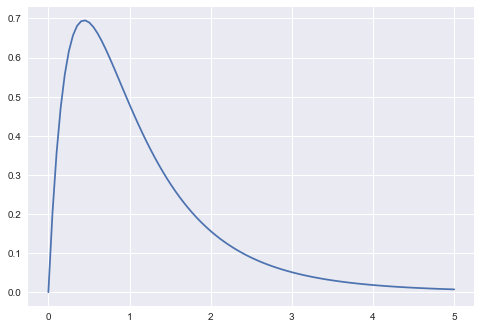

In [26]:
x = np.linspace(0,5,100)
dfn = 5 - 1
dfd = 5*4 - 5
y = stats.f.pdf(x, dfn, dfd)
plt.plot(x,y)
print(1 - stats.f.cdf(3.5, dfn, dfd))

## Корреляция

#### Ковариация 

(ко - совместная, вариация - изменчивость). Мера **линейной** зависимости двух случайных величин.

Если ковариация положительна, то с ростом значений одной случайной величины, значения второй имеют тенденцию возрастать, а если знак отрицательный — то убывать.

$$ cov(X, Y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{x})}}{N - 1} $$
где N - количество случайных величин, а единица - количество степеней свободы.

Однако только по **абсолютному** значению ковариации **нельзя судить** о том, **насколько сильно величины взаимосвязаны**, так как масштаб ковариации зависит от их дисперсий. Значение ковариации можно нормировать, поделив её на произведение среднеквадратических отклонений (квадратных корней из дисперсий) случайных величин. Полученная величина называется коэффициентом корреляции Пирсона, который всегда находится в интервале от −1 до 1:
$$ r(x, y) = \frac{cov(x, y)}{\sigma_x\sigma_y}$$

Давайте остановимся на формуле коэффициента корреляции, которую мы получили:
$$ r(x, y) = \frac{cov(x, y)}{\sigma_x\sigma_y}$$
запишем формулу чуть подробнее и выполним возможные преобразования:

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{(N - 1)\sqrt{\sum{\frac{(x_i - \bar{x})^2}{N-1}}}\sqrt{\sum{\frac{(y_i - \bar{y})^2}{N-1}}}} $$

теперь вынесем 1/ (N - 1) из под корней 

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{(N - 1)\frac{1}{(N-1)}\sqrt{\sum{(x_i - \bar{x})^2}}\sqrt{\sum{(y_i - \bar{y})^2}}} $$

и сократим (N - 1)

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}}\sqrt{\sum{(y_i - \bar{y})^2}}} $$

таким образом, мы сократили N - 1 в знаменателе и получили финальную формулу для коэффициента корреляции, которую вы часто сможете встретить в учебниках:

$$ r(x, y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2}\sum{(y_i - \bar{y})^2}}} $$

$ r(x,y)^{2} $ - коэффициент детерминации

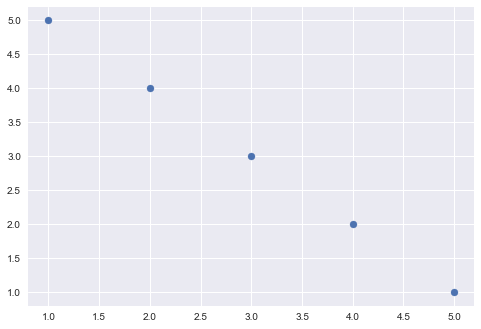

In [27]:
df = pd.DataFrame({
    'x': [4,5,2,3,1],
    'y': [2,1,4,3,5]
})
plt.scatter(df['x'], df['y'])

In [28]:
df.corr()

,x,y
x,1.0,-1.0
y,-1.0,1.0


## Регрессия с одной независимой переменной

В этой и следующих главах мы научимся работать  с **одномерным регрессионным анализом**, который позволяет проверять гипотезы о взаимосвязи одной  количественной зависимой переменной и нескольких независимых.

Сначала мы познакомимся с самым простым вариантом -  простой **линейной регрессией**, при помощи которой можно исследовать взаимосвязь двух переменных. Затем перейдем к множественной регрессии с несколькими независимыми переменными.

Линейная регрессия (англ. Linear regression) — используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной $y$ от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) $x$ с **линейной функцией зависимости**.

В общем виде функция линейной регрессии выглядит как:

$$ y = b_0 + b_1x $$
$b_0$ - intercept значение пересечения линии с осью Y 

$b_1$ - slope задаёт наклон линии регрессии

строят регрессионную прямую методом наименьших квадратов (МНК)

МНК - это способ нахождения оптимальных параметров линейной регресссии ($b_0$,  $b_1$), таких, что сумма квадратов ошибок (остатков) была минимальная.

Расчёт параметров идёт по таким формулам:

$$ b_1 = \frac{sd_y}{sd_x}r_{xy} $$
$$ b_0 = \bar{Y} - b_1\bar{X} $$

In [29]:
mx, dx, my, dy = 15, 25, 10, 36

b1 = (sqrt(dy)/sqrt(dx))*0.5
b1

0.6

## Применение регрессионного анализа

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('seaborn')

In [31]:
df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


Проанализируем наши данные на наличие связи между уровнем образования и уровнем бедности.
Для начала, визуализируем данные.

In [33]:
df.describe()

,metro_res,white,hs_grad,poverty,female_house
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,72.249020,81.719608,86.011765,11.349020,11.633333
std,15.275894,13.897223,3.725998,3.099185,2.356155
min,38.200000,25.900000,77.200000,5.600000,7.800000
25%,60.800000,76.800000,83.300000,9.250000,9.550000
50%,71.600000,85.400000,86.900000,10.600000,11.800000
75%,86.800000,90.250000,88.700000,13.400000,12.650000
max,100.000000,97.100000,92.100000,18.000000,18.900000


[]

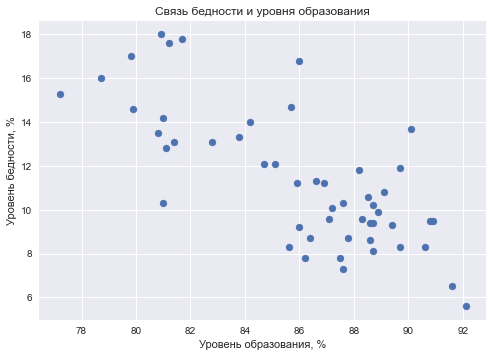

In [34]:
plt.scatter(df['hs_grad'], df['poverty'])
plt.xlabel('Уровень образования, %')
plt.ylabel('Уровень бедности, %')
plt.title('Связь бедности и уровня образования')
plt.plot()

## Проверка гипотез
Таким образом, модель поставленной задачи $\hat{y}=b_{0} + b_{1}x$ \
Сформулируем несколько гипотез: \
1) $H_{0}: b_{1} = 0$ \
2) $H_{1}: b_{1} \neq 0$ 

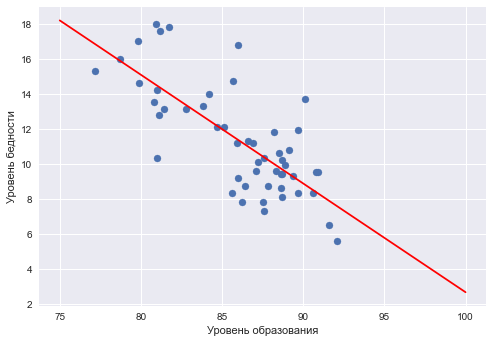

In [35]:
result = stats.linregress(df['hs_grad'], df['poverty'])

x = np.linspace(75, 100)
y_pred = lambda x: result.intercept + result.slope * x
plt.scatter(df['hs_grad'], df['poverty'])
plt.xlabel('Уровень образования')
plt.ylabel('Уровень бедности')
plt.plot(x, y_pred(x), color='red', label='prediction model')
plt.show()

In [36]:
y = lambda x: 64.78 - 0.62 * x
y(62)

26.340000000000003

In [37]:
promotion = 0 - (3.66 * 10 + 0.82 * 8 + 7.68 - 150) / 7.62
promotion

13.013123359580051

In [38]:
68.7 - 0.06 * 50 - 0.05 * 80 - 0.57 * 90

10.400000000000006